## Practice

### Q1-3

In [1]:
from sklearn.datasets import load_wine

In [2]:
X, y = load_wine(return_X_y=True)

In [3]:
X.shape, y.shape

((178, 13), (178,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(X_train, y_train)
dt_classifier.score(X_train, y_train)

1.0

In [6]:
dt_classifier.score(X_test, y_test)

0.9444444444444444

In [7]:
dt_classifier.get_depth()

6

In [8]:
data = load_wine(as_frame=True)
feature_names = data.feature_names
class_names = [f"{each}" for each in data.target.unique()]

[Text(0.375, 0.9285714285714286, 'flavanoids <= 0.975\ngini = 0.656\nsamples = 124\nvalue = [36, 52, 36]\nclass = 1'),
 Text(0.25, 0.7857142857142857, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]\nclass = 2'),
 Text(0.5, 0.7857142857142857, 'proline <= 760.0\ngini = 0.543\nsamples = 94\nvalue = [36, 52, 6]\nclass = 1'),
 Text(0.25, 0.6428571428571429, 'od280/od315_of_diluted_wines <= 1.505\ngini = 0.223\nsamples = 56\nvalue = [1, 49, 6]\nclass = 1'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = 2'),
 Text(0.375, 0.5, 'color_intensity <= 9.5\ngini = 0.076\nsamples = 51\nvalue = [1, 49, 1]\nclass = 1'),
 Text(0.25, 0.35714285714285715, 'malic_acid <= 3.925\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]\nclass = 1'),
 Text(0.125, 0.21428571428571427, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0]\nclass = 1'),
 Text(0.375, 0.21428571428571427, 'malic_acid <= 4.14\ngini = 0.32\nsamples = 5\nvalue = [1, 4, 0]\nclass = 1'),
 Text(0.25, 0.07142857142857142, 'gini = 

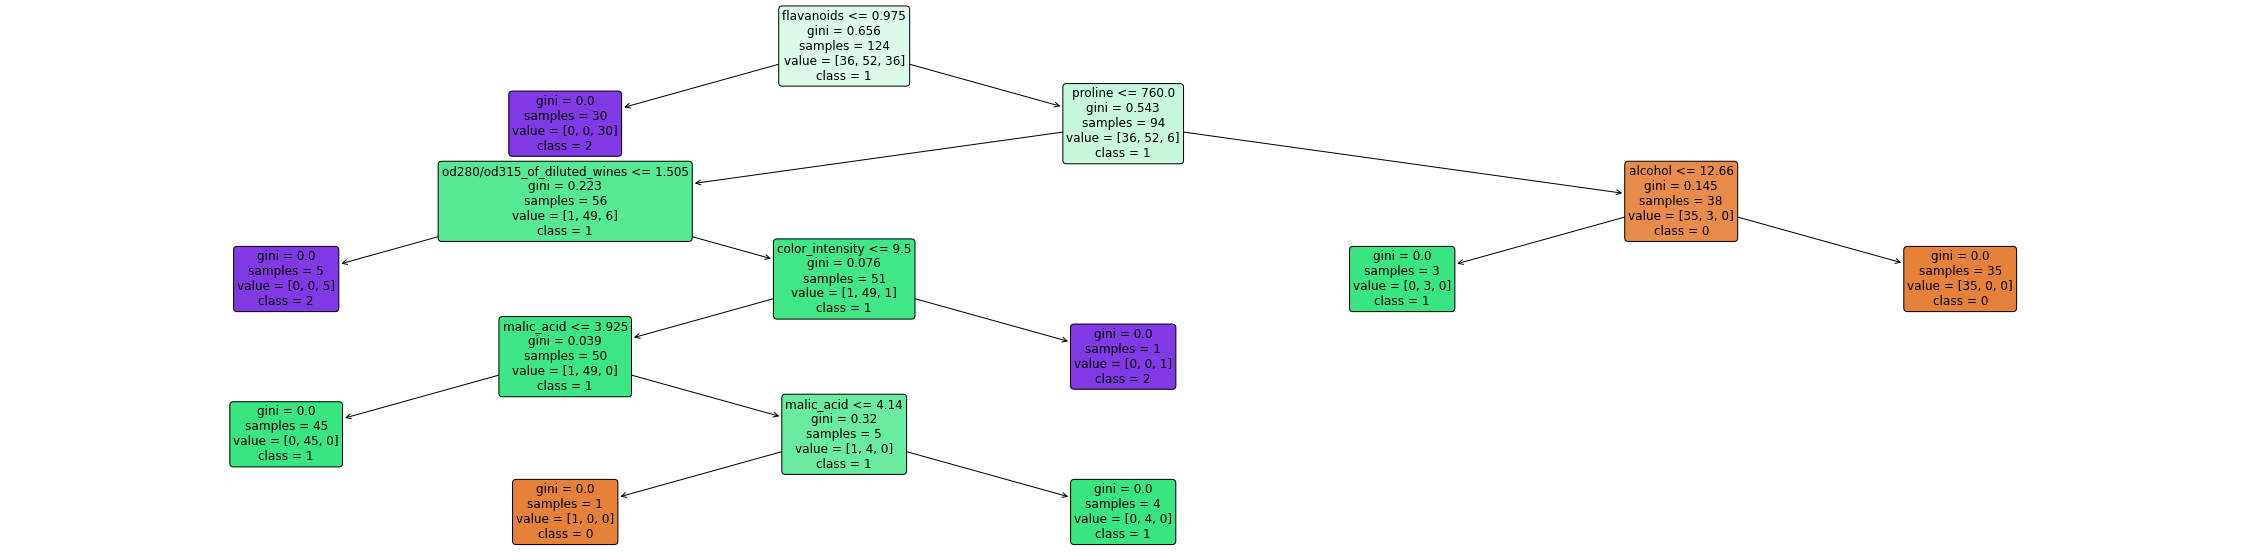

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 10), facecolor='w')
plot_tree(dt_classifier, feature_names=feature_names, class_names=class_names, rounded=True, filled=True, fontsize=12)

### Q4-6

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=3, min_samples_split=4, min_impurity_decrease=0.1, random_state=1)
dt_classifier.fit(X_train, y_train)
dt_classifier.score(X_train, y_train)

0.8145161290322581

In [11]:
dt_classifier.score(X_test, y_test)

0.7777777777777778

[Text(0.5555555555555556, 0.875, 'color_intensity <= 6.508\nentropy = 1.562\nsamples = 124\nvalue = [36, 52, 36]\nclass = 1'),
 Text(0.3333333333333333, 0.625, 'proline <= 994.339\nentropy = 1.419\nsamples = 96\nvalue = [29, 52, 15]\nclass = 1'),
 Text(0.2222222222222222, 0.375, 'od280/od315_of_diluted_wines <= 2.668\nentropy = 1.175\nsamples = 75\nvalue = [8, 52, 15]\nclass = 1'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.99\nsamples = 34\nvalue = [0, 19, 15]\nclass = 1'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.712\nsamples = 41\nvalue = [8, 33, 0]\nclass = 1'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0, 0]\nclass = 0'),
 Text(0.7777777777777778, 0.625, 'proline <= 890.421\nentropy = 0.811\nsamples = 28\nvalue = [7, 0, 21]\nclass = 2'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 21\nvalue = [0, 0, 21]\nclass = 2'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0, 0]\nclass = 0')]

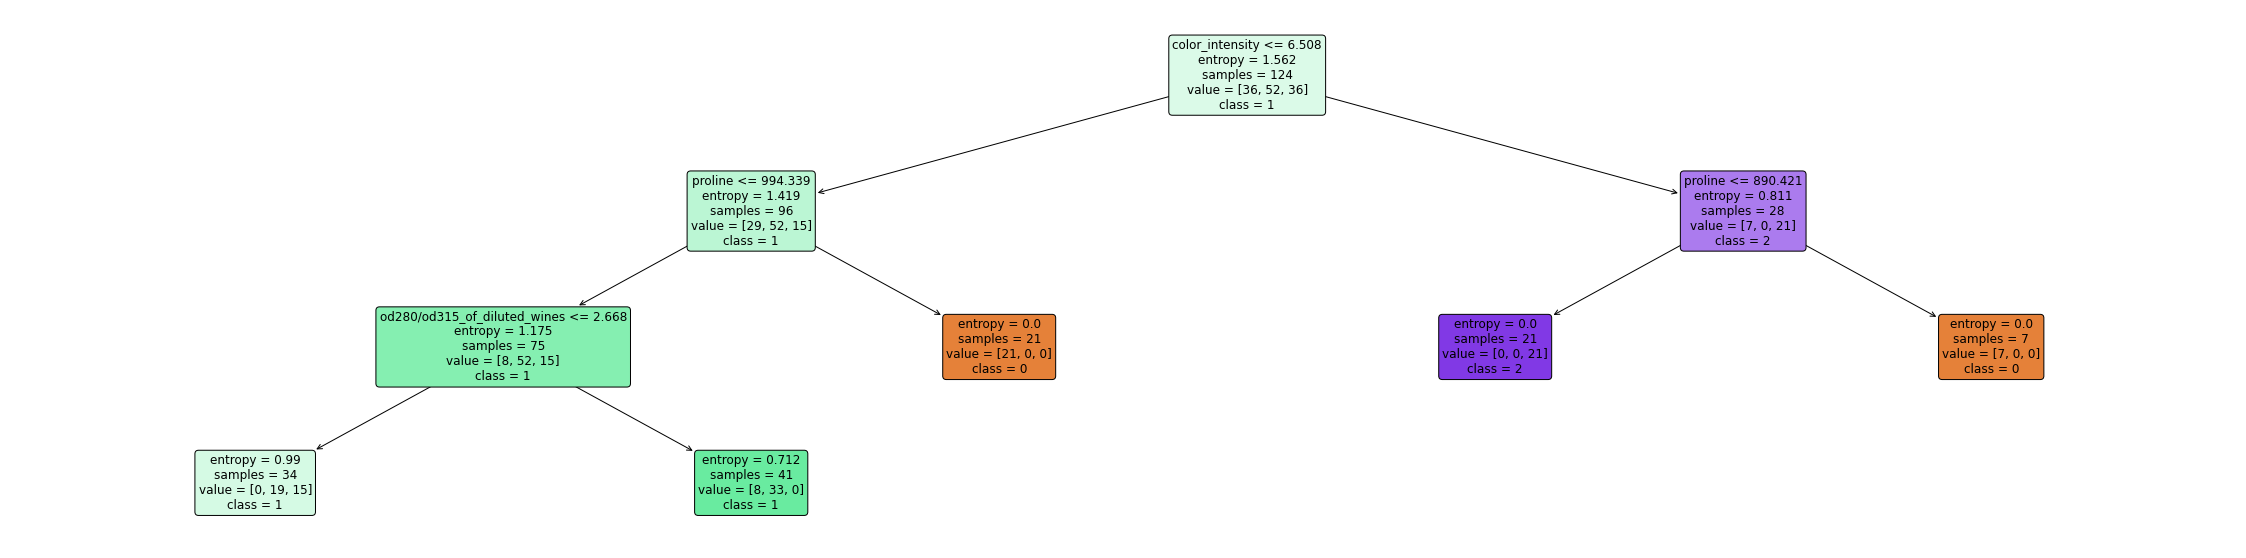

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 10), facecolor='w')
plot_tree(dt_classifier, feature_names=feature_names, class_names=class_names, rounded=True, filled=True, fontsize=12)

# Graded

### 1-3

In [13]:
from sklearn.datasets import load_wine

In [14]:
X, y = load_wine(return_X_y=True)

In [15]:
X.shape, y.shape

((178, 13), (178,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
criterion = ['entropy', 'gini']
splitter = ['random', 'best']
min_samples_leaf = [2,4,6,8,10]
max_depth = [3,4,5,6]

param_grid={'criterion': criterion, 'splitter': splitter, 'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth}

dt_classifier = DecisionTreeClassifier(random_state=1)
clf = GridSearchCV(dt_classifier, param_grid=param_grid, cv=4, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']},
             return_train_score=True)

In [19]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1)

In [20]:
clf.cv_results_['mean_test_score'].mean()

0.84375

In [21]:
clf_best = clf.best_estimator_
clf_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1)

In [22]:
print(clf_best.score(X_test, y_test))

0.9074074074074074


## 4-7

In [23]:
from sklearn.datasets import load_diabetes

In [24]:
X, y = load_diabetes(return_X_y=True)

In [25]:
X.shape, y.shape

((442, 10), (442,))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dt_classifier = DecisionTreeRegressor(criterion='squared_error', splitter='random', max_leaf_nodes=10, random_state=1)
dt_classifier.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=1, splitter='random')

In [29]:
dt_classifier.score(X_train, y_train)

0.5032060624566737

In [30]:
dt_classifier.score(X_test, y_test)

0.218771375137222

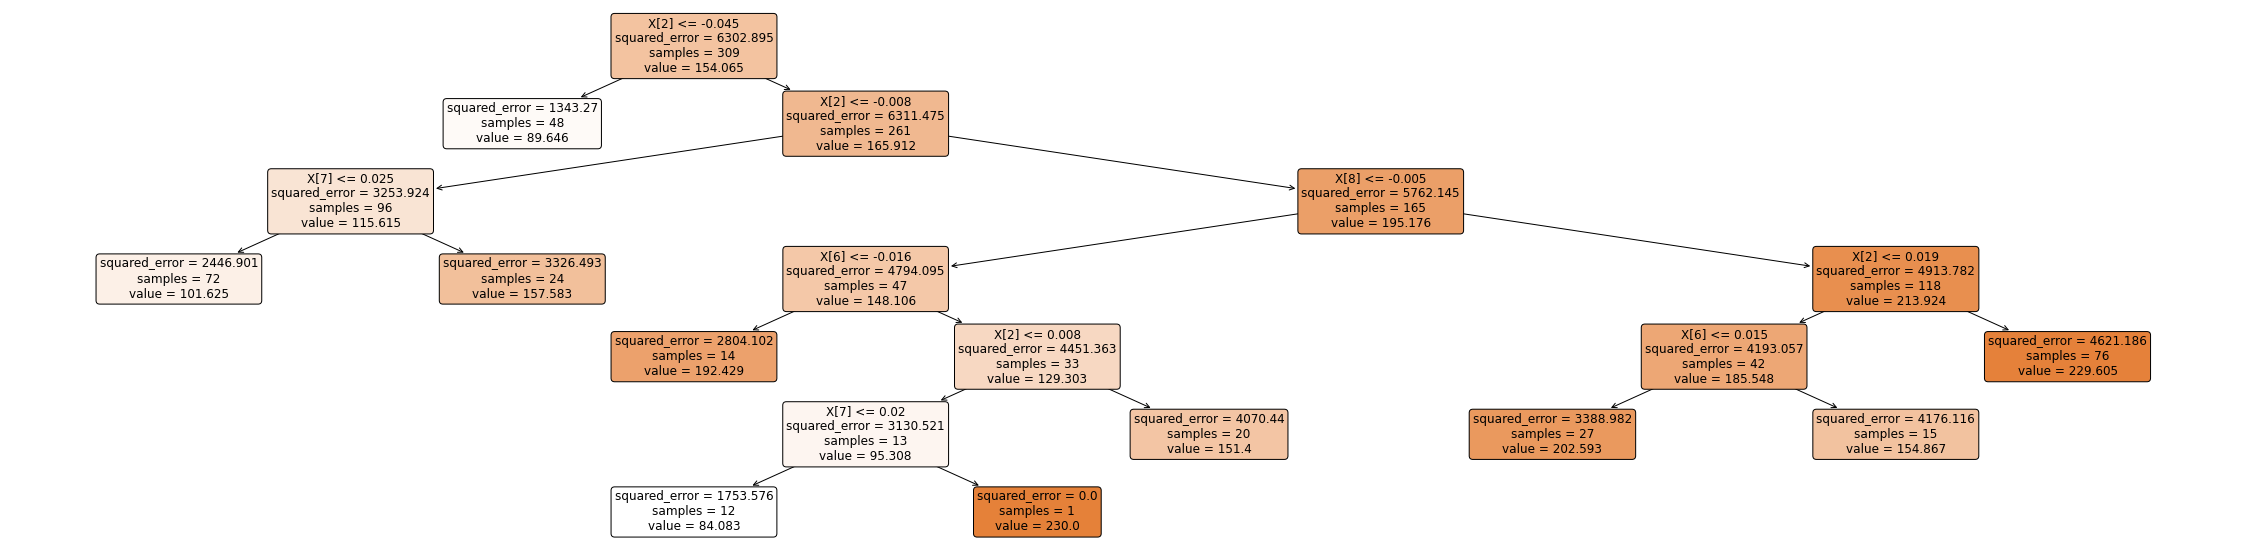

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
t = plot_tree(dt_classifier, filled=True, rounded=True, fontsize=12)
plt.show()

In [32]:
ratio = 48/261
print(ratio)

0.1839080459770115


## 8-9

In [33]:
from sklearn.datasets import load_diabetes

In [34]:
X, y = load_diabetes(return_X_y=True)

In [35]:
X.shape, y.shape

((442, 10), (442,))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['random', 'best']
max_features = ['auto','sqrt', 'log2']
ccp_alpha = [0.001,0.01,0.02,0.05]

param_grid = {'criterion': criterion, 'splitter': splitter, 'max_features': max_features, 'ccp_alpha': ccp_alpha}

dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=1)
clf = GridSearchCV(dt_regressor, param_grid=param_grid, cv=4, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(max_depth=4, random_state=1),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.05],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             return_train_score=True)

In [39]:
clf.cv_results_['mean_test_score'].mean()

0.23992468734287717

In [40]:
clf_best = clf.best_estimator_
clf_best.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.02, criterion='absolute_error', max_depth=4,
                      max_features='auto', random_state=1)

In [41]:
clf_best.score(X_test, y_test)

0.10873445074064803

In [42]:
clf.best_params_

{'ccp_alpha': 0.02,
 'criterion': 'absolute_error',
 'max_features': 'auto',
 'splitter': 'best'}